In [1]:
import sys
sys.path.append('../')

from ift6758.features import tidy_data

In [2]:
import pandas as pd
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def get_data(season):
    f = open("../ift6758/data/dataset/"+season+"_regular.json",)
    json_data = json.load(f)
    extracted_data = tidy_data.extract_data_from_json(json_data)
    df_r = tidy_data.tidy_data(extracted_data)

    f = open("../ift6758/data/dataset/"+season+"_playoffs.json",)
    json_data = json.load(f)
    extracted_data = tidy_data.extract_data_from_json(json_data)
    df_p = tidy_data.tidy_data(extracted_data)

    return pd.concat([df_r,df_p], axis=0)

In [4]:
df_2016 = get_data("2016")
df_2018 = get_data("2018")
df_2019 = get_data("2019")
df_2020 = get_data("2020")

# Question 5.1

In [5]:
def goal_shot_Type(df):
    df1 = df[["EventTypeId","ShotType"]]
    df1 = df1.dropna()
    return df1

In [6]:
df1_2016 = goal_shot_Type(df_2016)
df1_2016.head()

,EventTypeId,ShotType
0,SHOT,Wrist Shot
1,SHOT,Wrist Shot
2,SHOT,Wrist Shot
3,SHOT,Slap Shot
4,SHOT,Wrist Shot


In [7]:
df1_2016_p = df1_2016.groupby(['ShotType', 'EventTypeId'])[['ShotType', 'EventTypeId']].size().unstack().fillna(0)
df1_2016_p['totalShot']=df1_2016_p['SHOT']+df1_2016_p['GOAL']
df1_2016_p['percGoal']=(df1_2016_p['GOAL']/df1_2016_p['totalShot']*100).round(2)
df1_2016_p = df1_2016_p.sort_values('percGoal', ascending=False)
df1_2016_p

EventTypeId,GOAL,SHOT,totalShot,percGoal
ShotType,,,,
Deflected,199,806,1005,19.80
Tip-In,713,3267,3980,17.91
Backhand,698,5862,6560,10.64
Snap Shot,1172,11561,12733,9.20
Wrist Shot,3681,38056,41737,8.82
Wrap-around,70,773,843,8.30
Slap Shot,829,12691,13520,6.13


Text(0.5, 1.0, '% Goals per shot type')

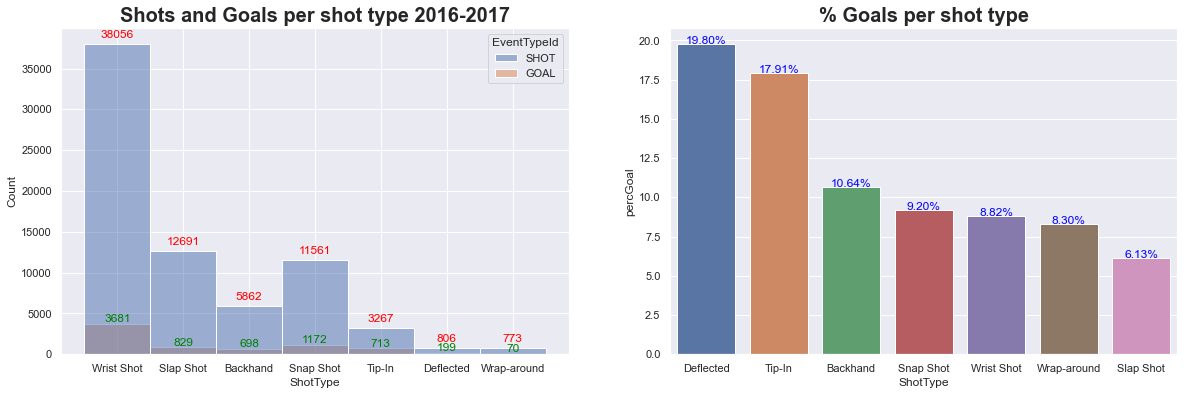

In [19]:
sns.set(rc={'figure.figsize':(20,6)})

f, axes = plt.subplots(1,2)

ax1 = sns.histplot(data=df1_2016, x="ShotType", hue="EventTypeId", ax=axes[0]) 

i=0
goal = []

for p in ax1.patches: 
    
    if i>6:
        ax1.text(p.get_x() + p.get_width()/2,
            p.get_height()+500,
            p.get_height(), 
            fontsize=12,
            color='red',
            ha='center',
            va='bottom')
    else:
        goal.append(p.get_height())
        ax1.text(p.get_x() + p.get_width()/2,
            p.get_height(),
            p.get_height(),
            fontsize=12,
            color='green',
            ha='center',
            va='bottom')

    i += 1
    
ax1.set_title("Shots and Goals per shot type 2016-2017", fontdict= { 'fontsize': 20, 'fontweight':'bold'}) 



p2 = sns.barplot(x=df1_2016_p.index, y='percGoal', data=df1_2016_p, ax=axes[1])

for p in p2.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height()
        value = '{:.2f}%'.format(p.get_height())
        p2.text(_x, _y, value, ha="center", fontsize = 12, color="blue") 

p2.set_title("% Goals per shot type", fontdict= { 'fontsize': 20, 'fontweight':'bold'})



# Question 5.2

In [9]:
def goal_shot_distance(df, season, scale_shot, max_shot=200):
    df1 = df[["EventTypeId","ShotType","Coordinates.x", "Coordinates.y", "rinkSide" ]]
    df1 = df1.dropna()
    df1 = df1.replace("right", -1)
    df1 = df1.replace("left", 1)
    df1["shot_distance"] = ( (df1["rinkSide"]*89-df1['Coordinates.x'])**2 + df1['Coordinates.y']**2   )**(0.5)
    df1 = df1[df1['shot_distance']<max_shot]
    df1["shot_range_distance"] = df1["shot_distance"].floordiv(scale_shot)*scale_shot+scale_shot
    df1["season"] = season
    df1 = df1[['EventTypeId', 'season','shot_range_distance']].groupby(['shot_range_distance', 'season', 'EventTypeId'])['shot_range_distance', 'season'].size().unstack().fillna(0)
    df1['totalShot']=df1['SHOT']+df1['GOAL']
    df1['percGoal']=0
    df1['percGoal']=df1['GOAL']/df1['totalShot']
    return df1.sort_values(by='shot_range_distance', ascending=True)

In [21]:
df2_2018 = goal_shot_distance(df_2018, "2018-2019", 20)
df2_2019 = goal_shot_distance(df_2019, "2019-2020", 20)
df2_2020 = goal_shot_distance(df_2020, "2020-2021", 20)

df2 = pd.concat([df2_2018,df2_2019,df2_2020], axis=0)
df2.reset_index( inplace=True)
df2

<ipython-input-9-191135f15ffc>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df1[['EventTypeId', 'season','shot_range_distance']].groupby(['shot_range_distance', 'season', 'EventTypeId'])['shot_range_distance', 'season'].size().unstack().fillna(0)
<ipython-input-9-191135f15ffc>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df1[['EventTypeId', 'season','shot_range_distance']].groupby(['shot_range_distance', 'season', 'EventTypeId'])['shot_range_distance', 'season'].size().unstack().fillna(0)
<ipython-input-9-191135f15ffc>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df1[['EventTypeId', 'season','shot_range_distance']].groupby(['shot_range_distance', 'season', 'EventTypeId'])['shot_range_distance', 'season'].size().uns

EventTypeId,shot_range_distance,season,GOAL,SHOT,totalShot,percGoal
0,20.0,2018-2019,4273,20485,24758,0.172591
1,40.0,2018-2019,2529,23635,26164,0.096660
2,60.0,2018-2019,871,22456,23327,0.037339
3,80.0,2018-2019,134,5094,5228,0.025631
4,100.0,2018-2019,48,1277,1325,0.036226
5,120.0,2018-2019,18,420,438,0.041096
6,140.0,2018-2019,31,468,499,0.062124
7,160.0,2018-2019,38,510,548,0.069343
8,180.0,2018-2019,33,553,586,0.056314
9,200.0,2018-2019,20,193,213,0.093897


Text(0.5, 1.0, '% Goals per distance shot')

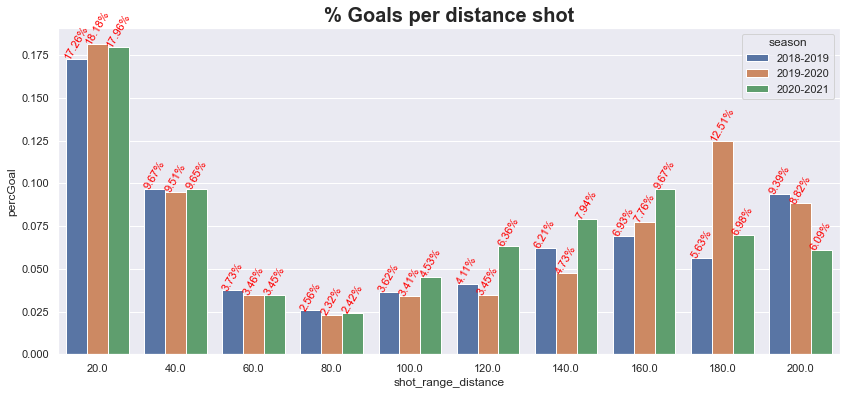

In [24]:
sns.set(rc={'figure.figsize':(14,6)})

p1 = sns.barplot(x="shot_range_distance", y='percGoal', hue="season", data=df2)

for p in p1.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height()
        value = '{:.2f}%'.format(p.get_height()*100)
        p1.text(_x, _y, value, ha="center", fontsize = 11, color="red", rotation=60) 

p1.set_title("% Goals per distance shot", fontdict= { 'fontsize': 20, 'fontweight':'bold'}) 


In [12]:
df2_2018 = goal_shot_distance(df_2018, "2018-2019", 2,20)
df2_2019 = goal_shot_distance(df_2019, "2019-2020", 2,20)
df2_2020 = goal_shot_distance(df_2020, "2020-2021", 2,20)
df2 = pd.concat([df2_2018,df2_2019,df2_2020], axis=0)
df2.reset_index( inplace=True)
df2

<ipython-input-9-191135f15ffc>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df1[['EventTypeId', 'season','shot_range_distance']].groupby(['shot_range_distance', 'season', 'EventTypeId'])['shot_range_distance', 'season'].size().unstack().fillna(0)
<ipython-input-9-191135f15ffc>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df1[['EventTypeId', 'season','shot_range_distance']].groupby(['shot_range_distance', 'season', 'EventTypeId'])['shot_range_distance', 'season'].size().unstack().fillna(0)
<ipython-input-9-191135f15ffc>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df1[['EventTypeId', 'season','shot_range_distance']].groupby(['shot_range_distance', 'season', 'EventTypeId'])['shot_range_distance', 'season'].size().uns

EventTypeId,shot_range_distance,season,GOAL,SHOT,totalShot,percGoal
0,2.0,2018-2019,2.0,0.0,2.0,1.000000
1,4.0,2018-2019,37.0,41.0,78.0,0.474359
2,6.0,2018-2019,176.0,645.0,821.0,0.214373
3,8.0,2018-2019,472.0,1903.0,2375.0,0.198737
4,10.0,2018-2019,773.0,3549.0,4322.0,0.178852
5,12.0,2018-2019,787.0,3728.0,4515.0,0.174308
6,14.0,2018-2019,652.0,3311.0,3963.0,0.164522
7,16.0,2018-2019,505.0,2649.0,3154.0,0.160114
8,18.0,2018-2019,473.0,2492.0,2965.0,0.159528
9,20.0,2018-2019,396.0,2167.0,2563.0,0.154506


Text(0.5, 1.0, '% Goals per distance shot')

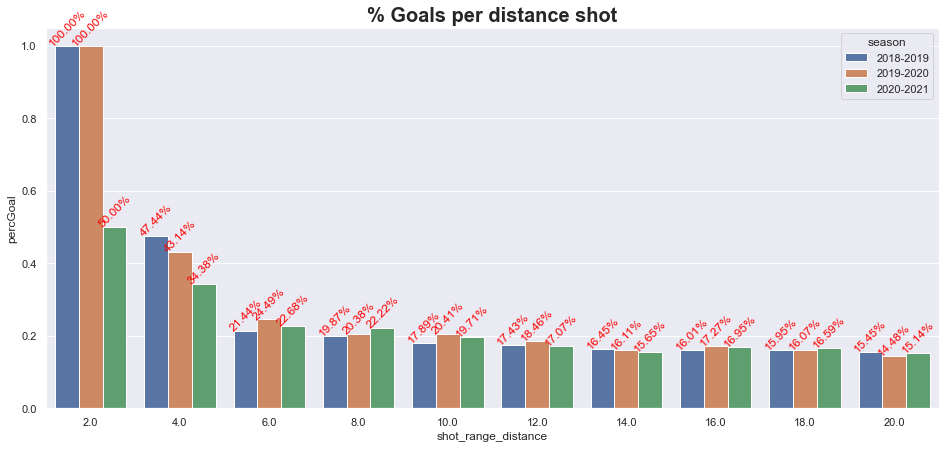

In [13]:
sns.set(rc={'figure.figsize':(14,6)})

p1 = sns.barplot(x="shot_range_distance", y='percGoal', hue="season", data=df2)

for p in p1.patches:
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height()
        value = '{:.2f}%'.format(p.get_height()*100)
        p1.text(_x, _y, value, ha="center", fontsize = 12, color="red", rotation=45) 

p1.set_title("% Goals per distance shot", fontdict= { 'fontsize': 20, 'fontweight':'bold'})

# Question 5.3

In [42]:
def goal_shot_Type_distance(df, scale_shot, max_shot=200):
    df1 = df[["EventTypeId","ShotType","Coordinates.x", "Coordinates.y", "rinkSide" ]]
    df1 = df1.dropna()
    df1 = df1.replace("right", -1)
    df1 = df1.replace("left", 1)
    df1["shot_distance"] = ( (df1["rinkSide"]*89-df1['Coordinates.x'])**2 + df1['Coordinates.y']**2   )**(0.5)
    df1 = df1[df1['shot_distance']<max_shot]
    df1["shot_range_distance"] = df1["shot_distance"].floordiv(scale_shot)*scale_shot+scale_shot
    df1 = df1.groupby(['ShotType','shot_range_distance', 'EventTypeId'])['ShotType','shot_range_distance'].size().unstack().fillna(0)
    df1['totalShot']=(df1['SHOT']+df1['GOAL']).apply(int)
    df1['percGoal']=(df1['GOAL']/df1['totalShot']*100).round(2)
    return df1
    

In [43]:
df3 = goal_shot_Type_distance(df_2016, scale_shot=20)
df3

<ipython-input-42-f248d734bc13>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df1.groupby(['ShotType','shot_range_distance', 'EventTypeId'])['ShotType','shot_range_distance'].size().unstack().fillna(0)


EventTypeId                      GOAL    SHOT  totalShot  percGoal
ShotType   shot_range_distance                                    
Backhand   20.0                 644.0  4105.0       4749     13.56
           40.0                  39.0  1372.0       1411      2.76
           60.0                   5.0   279.0        284      1.76
           80.0                   4.0    52.0         56      7.14
           100.0                  3.0    28.0         31      9.68
...                               ...     ...        ...       ...
Wrist Shot 120.0                 19.0    84.0        103     18.45
           140.0                 20.0   115.0        135     14.81
           160.0                 15.0   130.0        145     10.34
           180.0                 24.0   109.0        133     18.05
           200.0                  3.0    17.0         20     15.00

[61 rows x 4 columns]

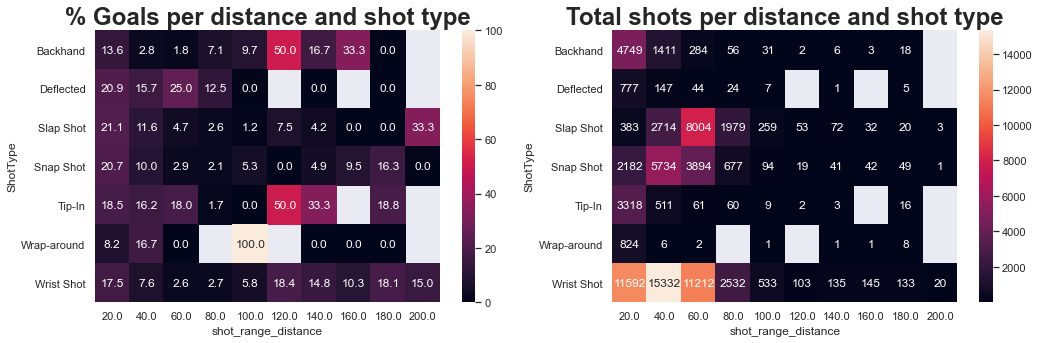

In [44]:
sns.set(rc={'figure.figsize':(17,5)})

f, axes = plt.subplots(1,2)

goals = pd.pivot_table(df3, values='percGoal', index="ShotType", columns='shot_range_distance')

totalShot = pd.pivot_table(df3, values='totalShot', index="ShotType", columns='shot_range_distance')

ax1 = sns.heatmap(goals, annot=True, fmt='.1f' , ax=axes[0]).set_title("% Goals per distance and shot type", 
                                                            fontdict= { 'fontsize': 24, 'fontweight':'bold'})

ax2 = sns.heatmap(totalShot, annot=True, fmt='.0f' , ax=axes[1]).set_title("Total shots per distance and shot type", 
                                                            fontdict= { 'fontsize': 24, 'fontweight':'bold'})


In [45]:
df3 = goal_shot_Type_distance(df_2016, scale_shot=2, max_shot=20)
df3

<ipython-input-42-f248d734bc13>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df1.groupby(['ShotType','shot_range_distance', 'EventTypeId'])['ShotType','shot_range_distance'].size().unstack().fillna(0)


EventTypeId                      GOAL    SHOT  totalShot  percGoal
ShotType   shot_range_distance                                    
Backhand   4.0                    7.0     7.0         14     50.00
           6.0                   38.0    79.0        117     32.48
           8.0                   81.0   394.0        475     17.05
           10.0                 184.0   862.0       1046     17.59
           12.0                 160.0   832.0        992     16.13
...                               ...     ...        ...       ...
Wrist Shot 12.0                 396.0  1679.0       2075     19.08
           14.0                 339.0  1520.0       1859     18.24
           16.0                 231.0  1238.0       1469     15.72
           18.0                 230.0  1249.0       1479     15.55
           20.0                 180.0  1260.0       1440     12.50

[66 rows x 4 columns]

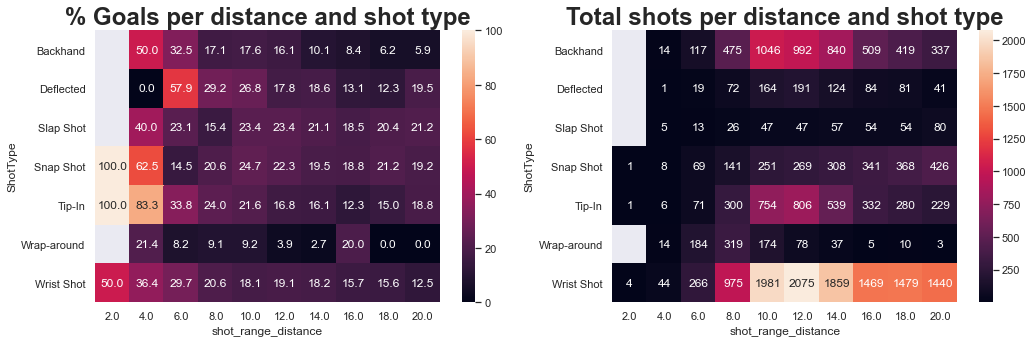

In [46]:
sns.set(rc={'figure.figsize':(17,5)})

f, axes = plt.subplots(1,2)

goals = pd.pivot_table(df3, values='percGoal', index="ShotType", columns='shot_range_distance')

totalShot = pd.pivot_table(df3, values='totalShot', index="ShotType", columns='shot_range_distance')

ax1 = sns.heatmap(goals, annot=True, fmt='.1f' , ax=axes[0]).set_title("% Goals per distance and shot type", 
                                                            fontdict= { 'fontsize': 24, 'fontweight':'bold'})

ax2 = sns.heatmap(totalShot, annot=True, fmt='.0f' , ax=axes[1]).set_title("Total shots per distance and shot type", 
                                                            fontdict= { 'fontsize': 24, 'fontweight':'bold'})
